In [1]:
from astropy.coordinates import EarthLocation, SkyCoord
import matplotlib.pyplot as plt

In [2]:
import astropy.units as u

In [3]:
import sunpy.map

In [4]:
import sunpy.coordinates

Now I use an AIA 193 full Sun image on 2014 Nov at 19:15 UT as an example:

In [5]:
aiamap=sunpy.map.Map('aia.lev1_euv_12s.2014-11-01T191532Z.193.image_lev1.fits')

I then go to JPL Horizons (https://ssd.jpl.nasa.gov/horizons.cgi) and find out RA and DEC of the solar disk center. I use a geocentric observer because I do not know exactly where SDO is located at that time.

The following is assuming the target is at 1 AU (where the Sun is supposed to be)

In [6]:
sunc_1au=SkyCoord(ra='14h26m46.78',dec='-14d31m22.4s', distance=1.*u.au,frame='icrs').transform_to(aiamap.coordinate_frame)

This is assuming the target is at 1 ly away (very far!)

In [7]:
sunc_1ly=SkyCoord(ra='14h26m46.78',dec='-14d31m22.4s', distance=1.*u.lightyear,frame='icrs').transform_to(aiamap.coordinate_frame)

In [8]:
fig = plt.figure(figsize=(8,8))

In [9]:
ax = plt.subplot(projection=aiamap)

In [10]:
aiamap.plot(axes=ax)

In [11]:
aiamap.draw_grid(axes=ax)

In [12]:
aiamap.draw_limb(axes=ax)

In [13]:
ax.plot_coord(sunc_1au, '+w', ms=10, label='Sun Center 1 AU')

In [14]:
ax.plot_coord(sunc_1ly, '*r', ms=10, label='Sun Center 1 LY')

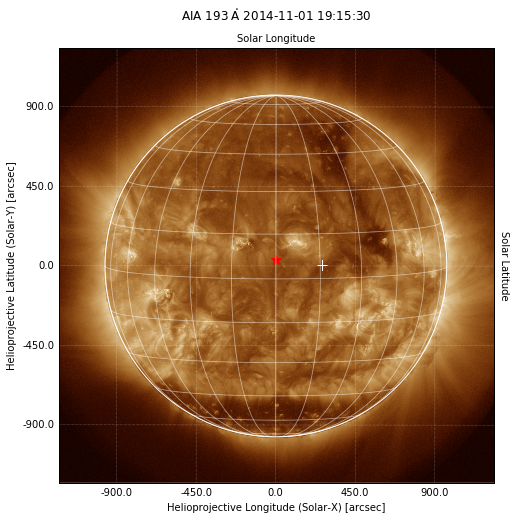

In [15]:
plt.show()

The solar center at 1 AU (white plus) is off by a lot. The center at 1 LY (red star) is reasonably close in X (within few arcsecs) but ~30 arcsecs off in Y. This may have some contribution from the wrong observer location as the input for JPL Horizons, but could this alone explain the 30 arcsec offset?